In [1]:
import pandas as pd
import numpy as np

In [2]:
tweets = pd.read_csv("C:/Users/Stavan/Desktop/New folder/Narendra Modi Tweets Analysis/narendramodi_tweets.csv")

In [3]:
tweets

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,7.079301e+17,1882.0,3691.0,2016-03-10 14:04:26,Passage of Real Estate Bill is great news for ...,en,False,26810043.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3216,7.079298e+17,1509.0,0.0,2016-03-10 14:03:19,RT @dpradhanbjp: Highlights of Pradhan Mantri ...,hi,False,26810043.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3217,7.078837e+17,3513.0,7644.0,2016-03-10 11:00:08,Successful launch of IRNSS-1F is an accomplish...,en,False,26810043.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3218,7.077499e+17,2522.0,6446.0,2016-03-10 02:08:17,"On CISF's Raising Day, I salute all CISF perso...",en,False,26810043.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter for BlackBerry


In [4]:
tweets["text"]

0       The President's address wonderfully encapsulat...
1       Rashtrapati Ji's address to both Houses of Par...
2       RT @PMOIndia: Empowering the marginalised. htt...
3       RT @PMOIndia: Commitment to welfare of farmers...
4       RT @PMOIndia: Improving the quality of life fo...
                              ...                        
3215    Passage of Real Estate Bill is great news for ...
3216    RT @dpradhanbjp: Highlights of Pradhan Mantri ...
3217    Successful launch of IRNSS-1F is an accomplish...
3218    On CISF's Raising Day, I salute all CISF perso...
3219    सफ़र में धूप तो होगी जो चल सको तो चलो... निदा ...
Name: text, Length: 3220, dtype: object

In [5]:
# data cleaning
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
corpus = []
for i in range(len(tweets["text"])):
    
    text = re.sub("[^a-zA-z]", " ", tweets["text"][i])
    text = text.lower()
    text = text.split()
    text = [wl.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
    corpus.append(" ".join(text))

In [6]:
corpus

['president address wonderfully encapsulated india strength aspiration potential amp effort towards transformingindia',
 'rashtrapati ji address house parliament depth amp extensive hear http co rdkqtjgnnx rashtrapatibhvn',
 'rt pmoindia empowering marginalised http co wwsqgw dk',
 'rt pmoindia commitment welfare farmer http co p aafrfmrc',
 'rt pmoindia improving quality life poor http co ugm vk z',
 'rt pmoindia financial inclusion poverty alleviation http co xt zyhhte',
 'rt rashtrapatibhvn four decade old demand one rank one pension orop armed force veteran fulfilled presidentmu',
 'rt rashtrapatibhvn government taken bold decision interest poor presidentmukherjee',
 'rt rashtrapatibhvn proactive act east policy govt focussing reducing isolation eastern region amp north east',
 'rt rashtrapatibhvn stand india initiative govt plan empower two half lakh sc st amp woman entrepreneur pr',
 'rt rashtrapatibhvn pradhan mantri fasal bima yojana expanded ambit risk coverage doubled sum ins

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 6000)
txt = cv.fit_transform(corpus).toarray()

In [8]:
txt.shape

(3220, 6000)

In [9]:
txt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
strings = " ".join(corpus) 

In [12]:
# data visualization
from wordcloud import WordCloud

In [21]:
word_cloud = WordCloud(width = 1200, height = 750, margin = 2).generate(strings)

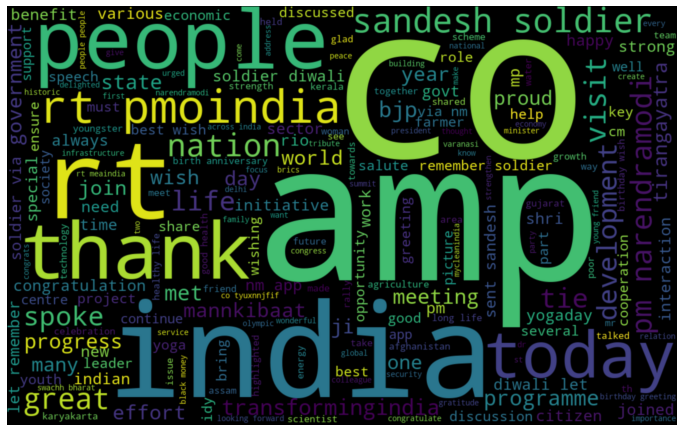

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(word_cloud,interpolation = "gaussian")
plt.axis("off")
plt.show()